In [1]:
men_study = 1
men_not_study = 9
women_study = 11
women_not_study = 3

men_total = men_study + men_not_study
men_total

10

In [2]:
women_total = women_study + women_not_study
women_total

14

In [3]:
study_total = men_study + women_study
study_total

12

In [4]:
not_study_total = men_not_study + women_not_study
not_study_total

12

In [5]:
n = women_total + men_total
n

24

In [6]:
study_total + not_study_total

24

In [7]:
p_man = men_total / n
p_man

0.4166666666666667

In [8]:
p_study = study_total / n
p_study

0.5

In [9]:
import random

def is_man():
    if random.random() <= p_man:
        return 1
    return 0

In [10]:
people = []
for i in range(100000):
    people.append(is_man())
sum(people) / len(people)

0.41435

In [11]:
def is_studier():
    if random.random() <= p_study:
        return 1
    return 0

In [12]:
people = []
for i in range(100000):
    people.append(is_studier())
sum(people) / len(people)

0.50056

In [13]:
def make_table(n_observations):
    simu_men_study = 0
    simu_men_not_study = 0
    simu_women_study = 0
    simu_women_not_study = 0
    for i in range(n_observations):
        if is_man():
            if is_studier():
                simu_men_study += 1
            else:
                simu_men_not_study += 1
        else: # A woman
            if is_studier():
                simu_women_study += 1
            else:
                simu_women_not_study += 1
    return simu_men_study, simu_men_not_study, simu_women_study, simu_women_not_study

In [14]:
make_table(n)

(2, 12, 3, 7)

In [15]:
make_table(n)

(2, 5, 6, 11)

In [31]:
def make_similar_table():
    while True:  # Run forever, until break
        s_m_s, s_m_ns, s_w_s, s_w_ns = make_table(n)
        if  s_m_s + s_m_ns != men_total:  # men for this table
            continue
        if s_w_s + s_w_ns != women_total:  # women for this table
            continue
        if s_m_s + s_w_s != study_total:
            continue
        if s_m_ns + s_w_ns != not_study_total:
            continue
        break # the rows and columns are all equal to the original
    return s_m_s, s_m_ns, s_w_s, s_w_ns

In [74]:
make_similar_table()

(6, 4, 6, 8)

In [36]:
p_woman = 1 - p_man
p_not_study = 1 - p_study
e_m_s = p_man * p_study * n
e_m_ns = p_man * p_not_study * n
e_w_s = p_woman * p_study * n
e_w_ns = p_woman * p_not_study * n

In [84]:
def chi2(m_s, m_ns, w_s, w_ns):
    oe2_m_s = (m_s - e_m_s) ** 2 / e_m_s
    oe2_m_ns = (m_ns - e_m_ns) ** 2 / e_m_ns
    oe2_w_s = (w_s - e_w_s) ** 2 / e_w_s
    oe2_w_ns = (w_ns - e_w_ns) ** 2 / e_w_ns
    return oe2_m_s + oe2_m_ns + oe2_w_s + oe2_w_ns

In [89]:
actual_chi2 = chi2(men_study, men_not_study, women_study, women_not_study)
actual_chi2

10.971428571428572

In [90]:
s_m_s, s_m_ns, s_w_s, s_w_ns = make_similar_table()
simulated_chi2 = chi2(s_m_s, s_m_ns, s_w_s, s_w_ns)
simulated_chi2

0.6857142857142858

In [113]:
n_repeats = 10000
simulated_chi2s = []
for i in range(n_repeats):
    s_m_s, s_m_ns, s_w_s, s_w_ns = make_similar_table()
    s_chi2 = chi2(s_m_s, s_m_ns, s_w_s, s_w_ns)
    simulated_chi2s.append(s_chi2)

In [114]:
%matplotlib inline

In [115]:
import matplotlib.pyplot as plt

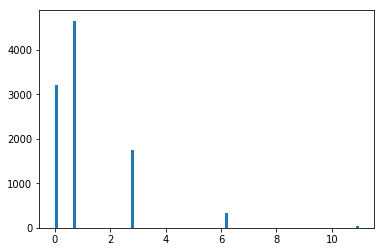

In [116]:
plt.hist(simulated_chi2s, bins=100);

In [117]:
simulated_chi2s.sort()

In [118]:
first_as_big = n_repeats
for i in range(n_repeats):
    if simulated_chi2s[i] >= actual_chi2:
        first_as_big = i
first_as_big

9999

In [119]:
number_as_big = n_repeats - first_as_big
proportion_as_big = number_as_big / n_repeats
print(proportion_as_big)

0.0001
